In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## I process with P controller

The transfer functions are

$$ C(s) = K_p$$

$$ P(s) = \frac{1}{T_i s}$$

the open loop transfer function is $G_0(s)=C(s)P(s)$

$$ G_0(s) = \frac{K_p}{T_i s}$$

the closed loop transfer function is:

$$ G(s) = \frac{\frac{K_p}{T_i s}}{1+\frac{K_p}{T_i s}} = \frac{\frac{K_p}{T_i s}}{\frac{T_i s + K_p}{T_i s}}$$

from where

$$ G(s) = \frac{Kp}{Kp+T_i s} = \frac{1}{1+\frac{T_i}{Kp}s}$$

In [25]:
# Bode plot
Ti = 50
Kp = 1

N = 1000
omega = np.logspace(-2,3,N)
Gjom = 1/(1+Ti/Kp*1j*omega)

# for Bode-plot
Kom1 = np.abs(Gjom)
Kom1_dB = 20*np.log10(Kom1)
phiom1 = np.angle(Gjom)
# for Nyquist-plot
reG = np.real(Gjom)
imG = np.imag(Gjom)

In [3]:
# Bode plot
Ti = 1/10
Kp = 1

N = 1000
omega = np.logspace(-2,3,N)
Gjom = 1/(1+Ti/Kp*1j*omega)

# for Bode-plot
Kom2 = np.abs(Gjom)
Kom2_dB = 20*np.log10(Kom2)
phiom2 = np.angle(Gjom)
# for Nyquist-plot
reG = np.real(Gjom)
imG = np.imag(Gjom)

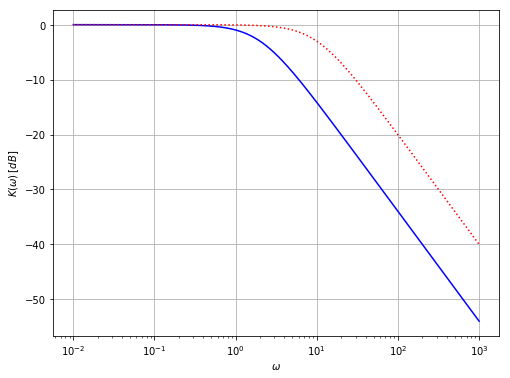

In [4]:
# Bode plot
plt.figure(figsize=(8,6))
plt.semilogx(omega,Kom1_dB,'b-'), plt.grid(True)
plt.semilogx(omega,Kom2_dB,'r:')
plt.xlabel('$\omega$'), plt.ylabel('$K(\omega)\>[dB]$');

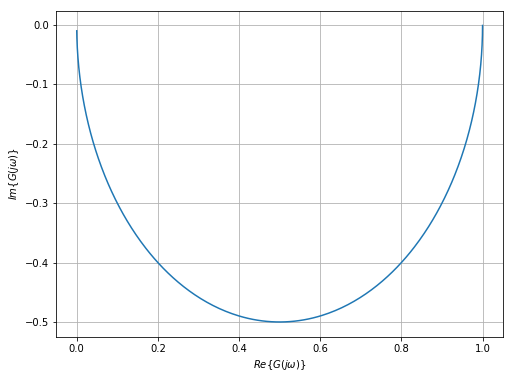

In [5]:
# Nyquist-plot
plt.figure(figsize=(8,6))
plt.plot(reG, imG), plt.grid(True),
plt.xlabel('$Re\{G(j\omega)\}$'), plt.ylabel('$Im\{G(j\omega)\}$');

**Q1.** What is the effect of changing parameters ($K_p, T_i$)? Take notes about your findings.

In [14]:
# Ti is related to the I process in this example.
# Increasing the value of it inversely affects the rate of change of the process.
# This is more clearly seen in the time domain investigation of the I process.

# Kp is related to the P controller in this example. It tells how "important"
# an error is for our system as errors have a factor Kp in this setting.
# By increasing the "importance" of errors, the time taken to reach the reference
# value gets decreased.

**Q2.** What is the step response of the closed loop? (What is $y(t)$ if $r(t)$ is the unit step?)

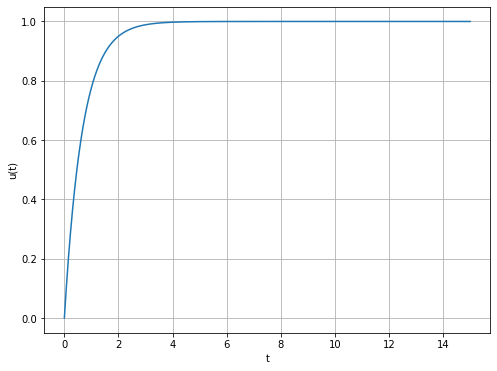

In [33]:
# It is a PT1-like system but with a unit gain.
T_I = 2
K_P = 3
t = np.linspace(0, 15, 1000)
y_t = 1-np.exp(-t/(T_I/K_P))
# plot
plt.figure(figsize=(8, 6))
plt.plot(t, y_t)
plt.xlabel(r"t")
plt.ylabel(r"u(t)")
plt.grid(True)

**Q3.** Compare this system to P-process with I-controller. What is the difference?

In [16]:
# From the mathematics point of view, they are same